                                                                                                  Данг Куинь Ньы, БПМИ182
                                                                                                    ПСМО-Дз-3, 17.12.2020

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Задание 1

Майло Тэтч исследует выборку независимых одинаково распределённых случайных величин $X_1$, $\ldots$, $X_n$ из нормального $\mathcal{N}(\mu, 1)$ распределения.

a) Симулируйте такую выборку при $n = 100$, $\mu = 5$

In [2]:
n = 100
mu = 5
sample = np.random.normal(mu, 1, n)

b) Научный опыт Майло говорит, что $f(\mu)$ непременно равна $1$. Найдите апостериорную плотность $f(\mu | X)$ аналитически и постройте её график.

$$f(\mu \mid X) = \cfrac{f(X \mid \mu) f(\mu)}{f(X)} = \cfrac{\prod\limits_{i=1}^{n}f(X = x_i \mid \mu)}{\int f(X \mid \mu)\,d\mu} = \cfrac{\prod\limits_{i=1}^{n}\frac{1}{\sqrt{2\pi}}\exp{\left(-\frac{(x_i - \mu)^2}{2}\right)}}{\int f(X \mid \mu)\,d\mu} = \cfrac{\frac{1}{(2\pi)^{n/2}}\exp{\left(-\frac{\sum\limits_{i=1}^{n}(x_i-\mu)^2}{2}\right)}}{\int f(X \mid \mu)\,d\mu}$$

*Посчитаем $f(X) = \int f(X \mid \mu) \,d\mu$:*

$$f(X \mid \mu) = \frac{1}{(2\pi)^{n/2}} \exp{\left(-\frac{1}{2}\sum\limits_{i=1}^{n}(x_i-\mu)^2\right)} = \frac{1}{(2\pi)^{n/2}} \exp{\left(-\frac{n}{2}\left(\overline{X^2} - \overline{X}^2 + (\mu - \overline{X})^2\right)\right)} = $$
$$=\frac{1}{(2\pi)^{n/2}} \exp{\left(-\frac{n}{2}\left(\overline{X^2} - \overline{X}^2\right)\right)} \exp{\left(-\frac{1}{2\cdot 1/n}(\mu - \overline{X})^2)\right)}$$

$$f(X) = \int f(X \mid \mu) \,d\mu = \int\limits_{-\infty}^{+\infty}\frac{1}{(2\pi)^{n/2}} \exp{\left(-\frac{n}{2}\left(\overline{X^2} - \overline{X}^2\right)\right)} \exp{\left(-\frac{1}{2\cdot 1/n}(\mu - \overline{X})^2)\right)} \,d\mu =$$
$$=\frac{1}{(2\pi)^{n/2}} \exp{\left(-\frac{n}{2}\left(\overline{X^2} - \overline{X}^2\right)\right)} \int\limits_{-\infty}^{+\infty}\exp{\left(-\frac{1}{2\cdot 1/n}(\mu - \overline{X})^2)\right)} \,d\mu =$$
$$=\frac{1}{(2\pi)^{n/2}} \exp{\left(-\frac{n}{2}\left(\overline{X^2} - \overline{X}^2\right)\right)} \sqrt{\frac{2\pi}{n}}\underbrace{\int\limits_{-\infty}^{+\infty}\sqrt{\frac{n}{2\pi}}\exp{\left(-\frac{1}{2\cdot 1/n}(\mu - \overline{X})^2)\right)} \,d\mu}_{\text{= 1, т.к. подынт. ф-ция - плотность нормальной с.в.}}=$$
$$\frac{(2\pi)^{-(n-1)/2}}{\sqrt{n}} \exp{\left(-\frac{n}{2}\left(\overline{X^2} - \overline{X}^2\right)\right)}$$

*Вернёмся к апостериорному распределению:*

$$f(\mu \mid X) = \cfrac{\frac{1}{(2\pi)^{n/2}}\exp{\left(-\frac{\sum\limits_{i=1}^{n}(x_i-\mu)^2}{2}\right)}}{\int f(X \mid \mu)\,d\mu} = \cfrac{\frac{1}{(2\pi)^{n/2}}\exp{\left(-\frac{n}{2}\overline{X^2} + n\mu\overline{X} - \frac{n}{2}\mu^2\right)}}{\frac{1}{(2\pi)^{n/2}} \exp{\left(-\frac{n}{2}\left(\overline{X^2} - \overline{X}^2\right)\right)} \sqrt{\frac{2\pi}{n}}}=$$
$$=\cfrac{\exp{\left(-\frac{n}{2}(\mu-\overline{X})^2\right)}}{\sqrt{2\pi / n}}$$

*Отсюда получаем, что $\mu \mid X \sim \mathcal{N}(\overline{X}, \frac{1}{n})$*

In [3]:
from scipy.stats import norm
mu_grid = np.arange(4.8,5.02,0.001)
f_mu_x = norm.pdf(mu_grid, loc=np.mean(sample), scale=1 / n)

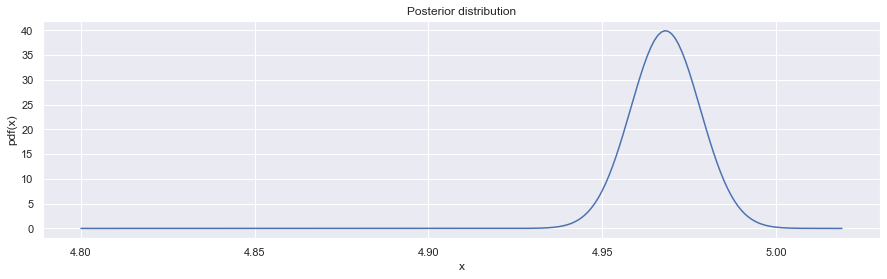

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
plt.title('Posterior distribution')
plt.plot(mu_grid,f_mu_x)
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.show()

c) Майло не хочет хранить апостериорную функцию плотности в явном виде и желает представить апостериорное распределение в виде массива чисел. Выберите любой способ сделать это и получите такой массив (размер массива -- на ваш вкус). Постройте гистограмму полученного массива и визуально оцените, насколько хорошо она приближает аналитическую апостериорную плотность.

In [5]:
mu_sample = np.random.normal(np.mean(sample), 1 / n, 1000)

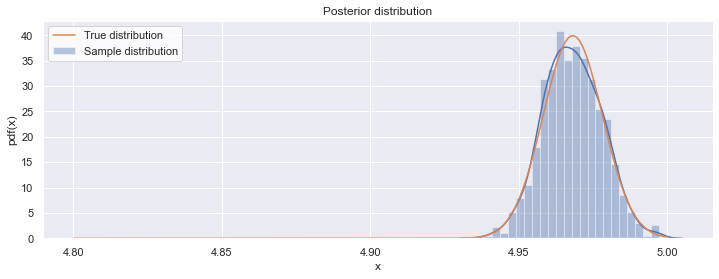

In [6]:
fig, ax = plt.subplots(1,1,figsize=(12,4))
plt.title('Posterior distribution')
sns.distplot(mu_sample,ax=ax, label='Sample distribution')
ax.plot(np.arange(4.8,5,0.0001), norm.pdf(np.arange(4.8,5,0.0001), loc=np.mean(sample), scale=1/n), label='True distribution')
plt.legend(facecolor='w')
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.show()

*По графику можно увидеть, что полученный массив `mu_sample` довольно хорошо приближает аналитическую апостериорную плотность.*

d) Майло считает, что недостаточно рассматривать только $\mu$: требуется изучить и $\theta = e^{\mu}$. Найдите апостериорную плотность $f(\theta | X)$ аналитически и при помощи симуляций. Для симуляций используйте следующий алгоритм:
- Симулируйте $Q_1$, $\ldots$, $Q_B$ из апостериорного распределения $\mu | X$.
- Рассчитайте $\gamma_i := e^{Q_i}$. Объявите $\gamma_1$, $\ldots$, $\gamma_B$ выборкой независимых одинаково распределённых случайных величин из апостериорного распределения $\theta | X$.

*Найдём апостериорную плотность аналитически:*

$$F(e^{\mu} \mid X) = \mathbb{P}\{e^{\mu} \leq \theta \mid X\} = \mathbb{P}\{\mu \leq \ln\theta \mid X\} = \int\limits_{-\infty}^{\ln\theta}f(\mu\mid X)\,d\mu =$$
$$=-\int\limits_{0}^{\infty}\sqrt{\frac{n}{2\pi}}\exp{\left(-\frac{(\mu-\overline{X})^2}{2/n}\right)}\,d\mu + \int\limits_{0}^{\ln\theta}\sqrt{\frac{n}{2\pi}}\exp{\left(-\frac{(\mu-\overline{X})^2}{2/n}\right)}\,d\mu, \quad \theta > 0$$

$$f(e^{\mu}\mid X) = F^{\prime}(e^{\mu} \mid X) = 0 + \sqrt{\frac{n}{2\pi}}\exp{\left(-\frac{(\mu-\overline{X})^2}{2/n}\right)}\Biggr|_{\mu=\ln\theta}\cdot(\ln\theta)^{\prime} = \sqrt{\frac{n}{2\pi}}\exp{\left(-\frac{(\mu-\overline{X})^2}{2/n}\right)}\frac{1}{\theta}, \quad \theta > 0$$

$$f(\theta \mid X) = \sqrt{\frac{n}{2\pi}}\exp{\left(-\frac{(\ln{\theta}-\overline{X})^2}{2/n}\right)}\frac{1}{\theta}I\{\theta > 0\}$$

*Возьмём сгенерированные в предыдущем пункте из распределения $\mu \mid X$ `mu_sample` и рассчитаем $\gamma_i = e^{Q_i}$:*

In [7]:
theta_sample = np.exp(mu_sample)

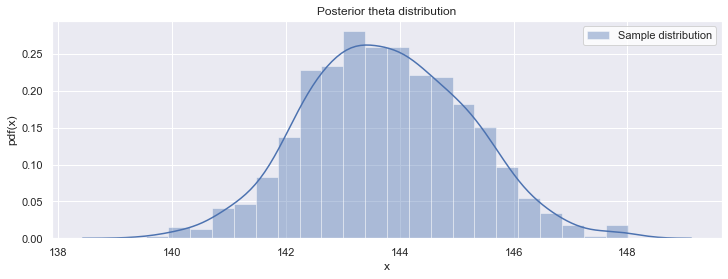

In [8]:
fig, ax = plt.subplots(1,1,figsize=(12,4))
plt.title('Posterior theta distribution')
sns.distplot(theta_sample,ax=ax, label='Sample distribution')
plt.legend(facecolor='w')
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.show()

e) Постройте 95\%-ый байесовский доверительный интервал для $\mu$.

$$\mathbb{P}\{\mu \in (c,d) \mid X\} = 0.95 \iff
\begin{cases}
    \mathbb{P}\{\mu > c \mid X\} = 0.025\\
    \mathbb{P}\{\mu < d \mid X\} = 0.025
\end{cases}
$$

$$\mathbb{P}\{\mu < d \mid X\} = \mathbb{P}\left\{\underbrace{\frac{\mu-\overline{X}}{1/n}}_{\text{по ЗБЧ} \sim \mathcal{N}(0,1)} < \frac{d-\overline{X}}{\sqrt{1/n}} \Biggr| X\right\} = 0.025 \implies \frac{d-\overline{X}}{\sqrt{1/n}} = 1.96 \text{ (аналогично для c)}$$

Получаем байесовский доверительный интервал:
$$\mu \in [\overline{X} - 1.96 / \sqrt{n}; \overline{X} + 1.96 / \sqrt{n}]$$

In [9]:
print('Credible interval: [%.4f' % (np.mean(sample) - 1.96 / np.sqrt(n)), '; %.4f' % (np.mean(sample) + 1.96 / np.sqrt(n)),']', sep='')

Credible interval: [4.7722; 5.1642]


f) Постройте 95\%-ый частотный доверительный интервал для $\mu$. 

*Из семинара 1 знаем, что $\hat{\mu}_{ML} = \overline{X}; \quad Var(\mu) = \dfrac{\sigma^2}{n} = \dfrac{1}{n}$*

*Полученный частотный доверительный интервал совпадает с байесовским:*
$$\mu \in [\overline{X} - 1.96 / \sqrt{n}; \overline{X} + 1.96 / \sqrt{n}]$$

In [10]:
# sigma2 = np.mean((sample - np.mean(sample))**2)
# var_mu = sigma2 / n
# print('Confidence interval: [%.4f' % (np.mean(sample) - 1.96 * np.sqrt(var_mu)), '; %.4f' % (np.mean(sample) + 1.96 * np.sqrt(var_mu)),']', sep='')
print('Confidence interval: [%.4f' % (np.mean(sample) - 1.96 / np.sqrt(n)), '; %.4f' % (np.mean(sample) + 1.96 / np.sqrt(n)),']', sep='')

Confidence interval: [4.7722; 5.1642]


# Задание 2

Оказавшись в Атлантиде, Майло Тэтч изучает местную флору. В частности, ему интересно, как влияют привычные удобрения на рост местного вида папоротников. Майло собирает случайную выборку из 500 папоротников и разделяет её на пять непересекающихся групп по 100 наблюдений в каждой. К четырём из них он применяет удобрения разных видов, а пятая группа объявляется контрольной. Результаты эксперимента приведены в таблице ниже. В первой строке указаны виды применяемых удобрений, а во второй -- число растений, для которых наблюдались улучшения в росте. 
	
|   Вид удобрения   | Без удобрения | DAP | MAP | NPK | UAN |
|-------------------|---------------|-----|-----|-----|-----|
|Улучшения в росте  |      42       |  37 |  17 |  74 |  44 |

a) Сформулируйте гипотезы о наличии (отсутствии) эффекта действия каждого удобрения. Проверьте каждую гипотезу на уровне значимости 5\%. Можно считать, что число наблюдений достаточно для применения асимптотических результатов. Для получения оценок используйте метод максимального правдоподобия.

*Обозначим для каждой группы $X_1,...,X_{n} \sim Bern(p)$ ($n=100$) - случайные бинарные величины, показывающие, наблюдалось ли улучшение для соответствующих растений. Тогда сформулируем гипотезу об отсутствии эффекта для произвольного удобрения следующим образом:*

$$
\begin{cases}
    H_0 : p_{\text{удобрение}} = p_{\text{без удобрения}} \\
    H_A : p_{\text{удобрение}} \neq p_{\text{без удобрения}}
\end{cases}
$$

*Найдём оценки $\hat{p}$ для каждой группы:*
$$f(p \mid X) = \prod_{i=1}^{100}p^{X_i}(1-p)^{1-X_i} = p^{\sum\limits_{i=1}^{100}X_i}(1-p)^{n-\sum\limits_{i=1}^{100}X_i}$$
$$\ln{f} = \sum\limits_{i=1}^{100}X_i \ln{p} + \left(n-\sum\limits_{i=1}^{100}X_i\right)\ln{(1-p)}$$
$$s = \ln^{\prime}{f} = \frac{\sum\limits_{i=1}^{100}X_i}{p} - \frac{1-\sum\limits_{i=1}^{100}X_i}{1-p} \rightarrow \frac{\sum\limits_{i=1}^{100}X_i}{\hat{p}} - \frac{1-\sum\limits_{i=1}^{100}X_i}{1-\hat{p}} = 0 \iff \hat{p}_{ML} = \overline{X}$$

*Получаем следующие оценки:*

|   Вид удобрения   | Без удобрения | DAP | MAP | NPK | UAN |
|-------------------|---------------|-----|-----|-----|-----|
|   $\hat{p}_{ML}$  |      0,42     |0,37 |0,17 |0,74 |0,44 |

In [11]:
p_0 = 0.42
p_hat = np.array([0.37, 0.17, 0.74, 0.44])

*Оценим дисперсии оценок:*
$$I(p) = \mathbb{E}(-\ell^{\prime\prime}) = \mathbb{E}\left(\frac{\sum\limits_{i=1}^{100}X_i}{p^2} + \frac{1 - \sum\limits_{i=1}^{100}X_i}{(1-p)^2}\right)  = \frac{n}{p} + \frac{n}{(1-p)} = \frac{n}{p(1-p)}$$

$$\hat{Var}(\hat{p}) = \hat{I}^{-1}({\hat{p}}) = \frac{\hat{p}(1-\hat{p})}{n}$$

*Получаем следующие оценки дисперсий:*

|   Вид удобрения     |    DAP |    MAP |    NPK |    UAN |
|---------------------|--------|--------|--------|--------|
|$\hat{Var}(\hat{p})$ |0.002331|0.001411|0.001924|0.002464|

In [12]:
var_p_hat = p_hat * (1-p_hat) / 100
var_p_hat

array([0.002331, 0.001411, 0.001924, 0.002464])

*Обозначим за $\hat{p}_0$ - оценку параметра в контрольной группе, $\hat{p}$ - оценку параметра в текущей рассматриваемой группе.*

*Будем считать Z-статистики $\left( z_{obs} = \frac{\hat{p}-\hat{p}_0}{\sqrt{\hat{Var}(\hat{p})}} \right)$:*

*Подставив в общую формулу подсчитанные выше оценки параметров, получаем следующие статистики:*

|   Вид удобрения   | DAP  | MAP  | NPK | UAN |
|-------------------|------|------|-----|-----|
|       $z_{obs}$   |-1.036|-6.655|7.295|0.403|

*При верной гипотезе статистики имеют стандартное нормальное распределение, критическое значение на уровне значимости 5% - $\pm 1.96$. Таким образом не отвергаются гипотезы для двух видов удобрений, DAP и UAN (посчитанные статистики по модулю меньше критического значения), а значит, они не имеют эффекта:*

|   Вид удобрения     | DAP | MAP | NPK | UAN |
|---------------------|-----|-----|-----|-----|
|гипотеза отвергается?| нет |  да |  да | нет |

In [13]:
z_obs = (p_hat - p_0) / np.sqrt(var_p_hat)
z_obs

array([-1.03561628, -6.65543585,  7.29537204,  0.40291148])

b) Проведите процедуру множественного тестирования методом Бонферрони. Изменились ли результаты? Напоминание: при полученной статистике $z_{obs}$ p-value можно рассчитать как $2\mathbb{P}\{Z \le -|z_{obs}| \mid H_0\}$ для двустороннего теста в случае симметричного распределения.

*Посчитаем $p-value  = 2\mathbb{P}\{Z \le - |z_{obs}| \mid H_0\}$ ($Z \stackrel{H_0}{\sim} \mathcal{N}(0,1)$)*
$$2\mathbb{P}\{Z \le - |z_{obs}| \mid H_0\} = 2\int\limits_{-\infty}^{-|z_{obs}|}\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}dx$$
*Используя функцию `cdf` из `scipy.stats.norm` получаем:*

|   Вид удобрения| DAP | MAP   | NPK   | UAN |
|----------------|-----|-------|-------|-----|
|p-value         | 0.3 |2.8e-11|2.9e-13| 0.7 |

In [14]:
p_values = 2 * norm.cdf(-abs(z_obs), loc=0, scale=1)
p_values

array([3.00381195e-01, 2.82461735e-11, 2.97834918e-13, 6.87013344e-01])

*Проведём тестирование методом Бонферрони, всего рассматриваемых видов удобрений 4, будем сравнивать p-value с $\frac{\alpha}{4} = \frac{0.05}{4} = 0.0125$. Результаты не изменяются (p-value DAP и UAN) больше 0.0125, значит, гипотеза для них опять не отвергается, эффекта от удобрений не наблюдается.*

|   Вид удобрения     | DAP | MAP | NPK | UAN |
|---------------------|-----|-----|-----|-----|
|гипотеза отвергается?| нет |  да |  да | нет |

c) Проведите процедуру множественного тестирования методом Бенджамини-Хохберга. Изменились ли результаты?

*Отсортируем значения p-value по возрастанию и посчитаем $l_i = \frac{i \cdot \alpha}{1 \cdot 4}$ (считаем, что данные в разных группах получены независимо друг от друга):*

|Вид удобрения| NPK   | MAP   |DAP   |UAN |
|-------------|-------|-------|------|----|
|p-value      |2.9e-13|2.8e-11|0.3   |0.7 |
|$l_i$        |0.0125 |0.025  |0.0375|0.05|

*Найдём порог:*
$$\max\{i : p_{(i)} < l_i\} = 2 \quad \quad(2.8e-11 < 0.025; 0.3 > 0.0375) \rightarrow T = p_{(2)} = 2.8e-11$$

*По методу гипотеза отвергается, если p-value $\leq T$, таким образом, результаты получаются такими же - для DAP и UAN гипотеза не отвергается, эффект этих видов удобрений считается ненаблюдаемым:*

|   Вид удобрения     | DAP | MAP | NPK | UAN |
|---------------------|-----|-----|-----|-----|
|гипотеза отвергается?| нет |  да |  да | нет |

d) Сделайте итоговый вывод о наличии эффекта действия каждого удобрения.

*При всех трёх методах тестирования получается, что наличие эффекта наблюдается у видов удобрений MAP и NPK, а для видов удобрений DAP и UAN эффект не наблюдается.*

|   Вид удобрения     | DAP | MAP | NPK | UAN |
|---------------------|-----|-----|-----|-----|
|наблюдается эффект?  | нет |  да |  да | нет |

e) Результаты тестирования удобрения MAP смутили Майло: они никак не согласовывались с его научным опытом. Поэтому для исследования эффекта действия этого удобрения Майло решил использовать байесовский подход. Пусть теперь $p_{MAP}$ -- случайная величина, и Майло уверен, что $p_{MAP} \sim \mathrm{Beta}(\alpha, \beta)$. Найдите какую-нибудь (на ваш выбор) точечную байесовскую оценку параметра $p_{MAP}$. Прокомментируйте, насколько сильно различаются частотная и байесовская оценки и поясните почему.

*Найдём апостериорное распределение $p_{MAP} \mid X$ с точностью до константы:*

$$f(p_{MAP} \mid X) \propto f(X \mid p_{MAP})f(p_{MAP}) = \left[\substack{s := \sum\limits_{i=1}^{100}X_i \\ p := p_{MAP}}\right] = p^s(1-p)^{100-s}\cdot\frac{1}{B(\alpha,\beta)}p^{\alpha-1}(1-p)^{\beta-1} = \frac{1}{B(\alpha,\beta)}p^{s+\alpha-1}(1-p)^{100-s+\beta-1}$$

*Найдём константу:*

$$f(X) = \int f(X \mid p)f(p)\,dp = \frac{1}{B(\alpha,\beta)}\int\limits_{0}^{1}p^{s+\alpha-1}(1-p)^{100-s+\beta-1}\,dp = \frac{B(s+\alpha,100-s+\beta)}{B(\alpha,\beta)}$$

*Получаем апостериорное распределение:*

$$f(p_{MAP} \mid X) = \frac{1}{B(\alpha,\beta)}p^{s+\alpha-1}(1-p)^{100-s+\beta-1} : \frac{B(s+\alpha,100-s+\beta)}{B(\alpha,\beta)} = \frac{1}{B(s+\alpha,100-s+\beta)}p^{s+\alpha-1}(1-p)^{100-s+\beta-1}$$

*Значит, $p_{MAP} \sim B(s+\alpha,100-s+\beta)$*

*Найдём точечную оценку: $\hat{p}_{MAP}^{bayes} = \mathbb{E}(p_{MAP} \mid X)$*

*При $Y \sim B(\alpha, \beta) \mathbb{E}Y = \frac{\alpha}{\alpha+\beta}$, значит, получаем следующую оценку:*

$$\hat{p}_{MAP}^{bayes} = \frac{s+\alpha}{100+\alpha+\beta}=\frac{17+\alpha}{100+\alpha+\beta}$$

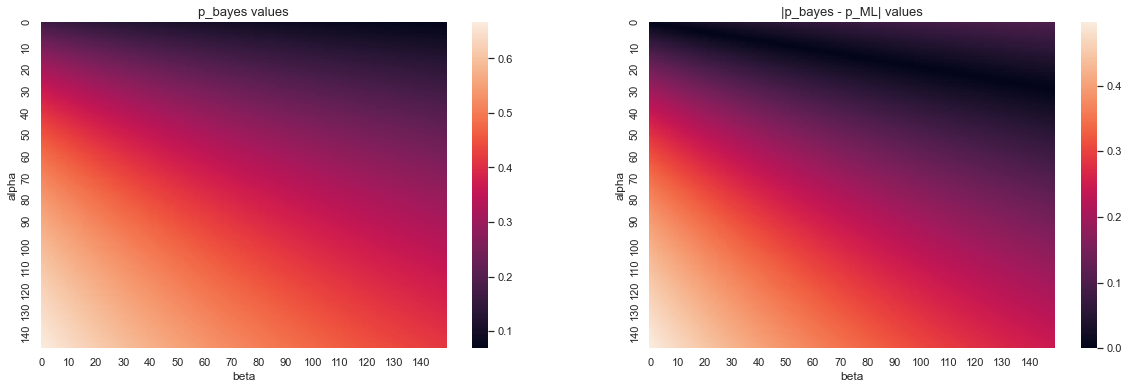

In [15]:
import pandas as pd
alpha_grid = np.arange(0,150,step=1)
beta_grid = np.arange(0,150,step=1)
fig, ax = plt.subplots(1,2,figsize=(20,6))

p_bayes = pd.DataFrame([[(17 + alpha) / (100 + alpha + beta) for beta in beta_grid] for alpha in alpha_grid], 
                       index=beta_grid, columns=alpha_grid)
ax[0] = sns.heatmap(p_bayes, xticklabels=10, yticklabels=10, ax=ax[0])
ax[0].set_title('p_bayes values', fontsize=13)
ax[0].set(xlabel='beta', ylabel='alpha')

pmap_errors = pd.DataFrame([[abs((17 + alpha) / (100 + alpha + beta) - 0.17) for beta in beta_grid] for alpha in alpha_grid], 
                           index=beta_grid, columns=alpha_grid)
ax[1] = sns.heatmap(pmap_errors, xticklabels=10, yticklabels=10, ax=ax[1])
ax[1].set_title('|p_bayes - p_ML| values', fontsize=13)
ax[1].set(xlabel='beta', ylabel='alpha')


plt.show()

*На графике слева нарисованы байесовские оценки при различных значениях $\alpha$ и $\beta$, на графике справа - абсолютная разница между байесовскими и частотными оценками.*

*Как можно заметить, при маленьких значениях $\alpha$ байесовские оценки наиболее близки к частотным, а с увеличением этого параметра разница между оценками также увеличивается. Объяснить разницу оценок можно тем, что апостериорное распределение учитывает распределение параметра $p_{MAP}$ (тогда как при нахождении частотной оценки рассматривается только распределение $f(X \mid p_{MAX})$), и при его максимизации максимизируется правдоподбие $f(p_{MAX})$, поэтому, чем больше $\alpha$, тем больше будут отличаться оценки друг от друга.*